In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Part 1 - Data Preprocessing

# Importing the libraries

import pandas as pd

In [5]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [8]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
# Initialising the RNN
regressor = Sequential()

In [11]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


c:\Users\Srushti\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [15]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.0946
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0071
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0048
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0051
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0048
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0050
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0045
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0047
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0047
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0034
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0045
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0037
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0039
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0041
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - lo

In [16]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [17]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Srushti\AppData\Local\Temp\ipykernel_15868\525762028.py:5: SyntaxWarning: invalid escape sequence '\P'
  stock_data = pd.read_csv('E:\PROJECTS\Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ-master\Google_Stock_Price_Train.csv')


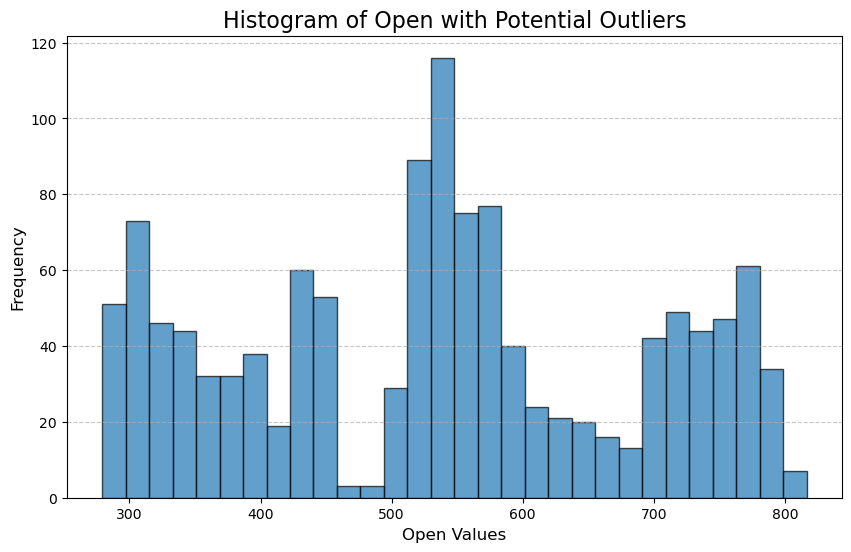

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load stock data
stock_data = pd.read_csv('E:\PROJECTS\Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ-master\Google_Stock_Price_Train.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Select the column to analyze for outliers (e.g., 'Open' stock price)
column_to_analyze = 'Open'

# Plot a histogram to visualize potential outliers
plt.figure(figsize=(10, 6))
plt.hist(stock_data[column_to_analyze], bins=30, edgecolor='black', alpha=0.7)
plt.title(f'Histogram of {column_to_analyze} with Potential Outliers', fontsize=16)
plt.xlabel(f'{column_to_analyze} Values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

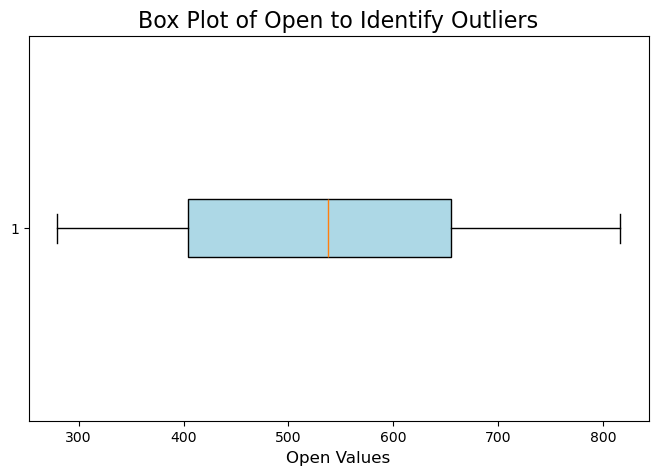

Number of outliers removed: 0
Filtered data without outliers:
        Date    Open    High     Low   Close      Volume
0 2012-01-03  325.25  332.83  324.97  663.59   7,380,500
1 2012-01-04  331.27  333.87  329.08  666.45   5,749,400
2 2012-01-05  329.83  330.75  326.89  657.21   6,590,300
3 2012-01-06  328.34  328.77  323.68  648.24   5,405,900
4 2012-01-09  322.04  322.29  309.46  620.76  11,688,800


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load stock data
stock_data = pd.read_csv('Google_Stock_Price_Train.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Select the column to analyze for outliers (e.g., 'Open' stock price)
column_to_analyze = 'Open'

# Create a box plot to visualize outliers
plt.figure(figsize=(8, 5))
plt.boxplot(stock_data[column_to_analyze], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title(f'Box Plot of {column_to_analyze} to Identify Outliers', fontsize=16)
plt.xlabel(f'{column_to_analyze} Values', fontsize=12)
plt.show()

# Identify outliers using the IQR method
Q1 = stock_data[column_to_analyze].quantile(0.25)
Q3 = stock_data[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = stock_data[(stock_data[column_to_analyze] >= lower_bound) & (stock_data[column_to_analyze] <= upper_bound)]

# Print summary of removed outliers
removed_outliers_count = len(stock_data) - len(filtered_data)
print(f"Number of outliers removed: {removed_outliers_count}")

# Display the cleaned data
print("Filtered data without outliers:")
print(filtered_data.head())

# Save the filtered data to a new CSV file (optional)
filtered_data.to_csv('Filtered_Stock_Data.csv', index=False)


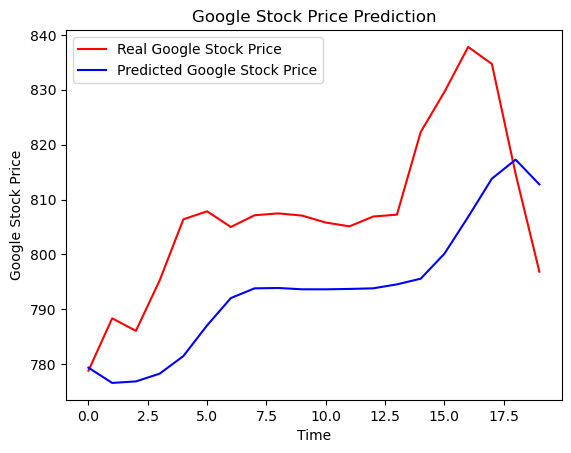

In [20]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
